Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file= open('/Users/jisasv1/Documents/ultimate_challenge/logins.json')

In [3]:
login_data = json.load(file)

In [5]:
#file2 = open('/Users/jisasv1/Documents/ultimate_challenge/ultimate_data_challenge.json')

In [6]:
type(login_data)

dict

In [7]:
login_data.keys()

dict_keys(['login_time'])

In [8]:
#Convert dictionary to pandas dataframe
#df = pd.DataFrame.from_dict(data)
login_df = pd.DataFrame.from_dict(login_data)

In [9]:
login_df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [10]:
type(login_df)

pandas.core.frame.DataFrame

In [11]:
login_df.shape

(93142, 1)

In [12]:
#Check if there are any null values
login_df.isna().sum()

login_time    0
dtype: int64

To do Time Series analysis we will have to change the 'login_time' column to python datetime and we’ll need to have a date time index so that our data frame is indexed on the timestamp.

In [13]:
#Convert login_time to python datetime index and set login_time as index
login_df['login_time']= pd.to_datetime(login_df['login_time'])
login_df.set_index('login_time', inplace=True)
login_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [14]:
#Let's create a column called 'count' and assign it to 1(so that we have a numeric data to count)
login_df['count']= 1

In [15]:
#df.groupby('a').count()
#login_counts= login_df.groupby('login_time').sum()
#login_counts

In [16]:
login_counts = login_df.resample('15min').sum()
login_counts

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


<AxesSubplot:xlabel='login_time'>

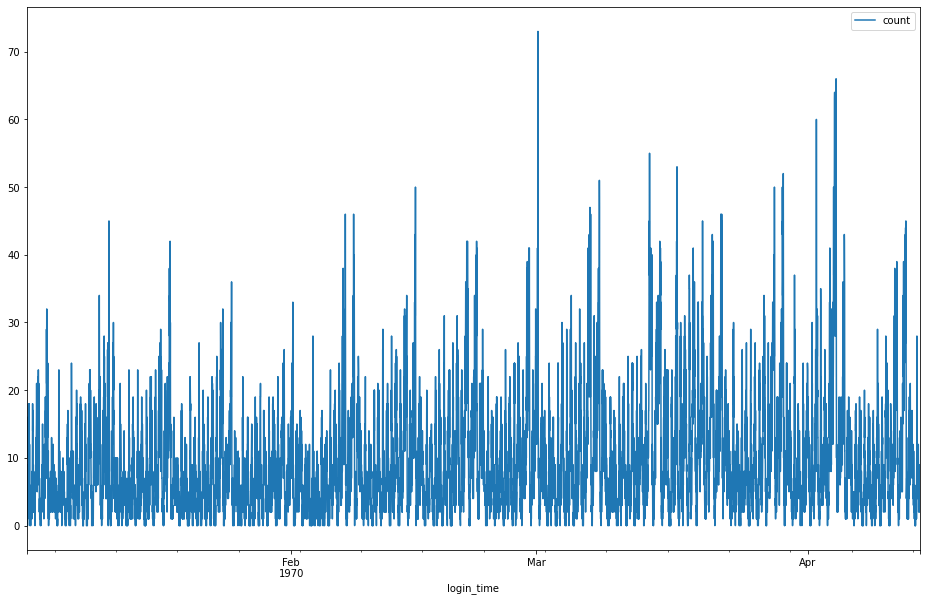

In [17]:
#Let's try visualizing our data using a simple matplotlib line graph
login_counts.plot(kind='line', figsize=(16,10))

Our plot has a lot of data(obvious, because we have resampled for every 15 mins for a period of 4 months).We can see that the login counts are highest during March followed by April.

In [18]:
login_counts.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


We could resample by 'day' and visualize our data.

<AxesSubplot:xlabel='login_time'>

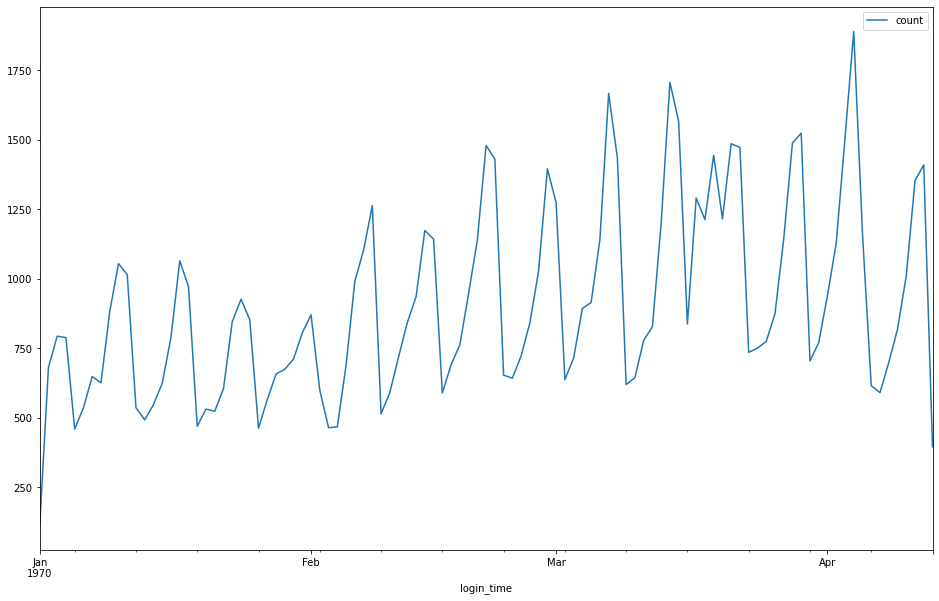

In [19]:
login_counts_perday = login_df.resample('D').sum()
login_counts_perday.plot(kind='line', figsize=(16,10))

Logins per day are less in the beginning of january. There is as light increase in daily logins towards the end of january. There is a surge in logins starting February, daily logins increase during march and they are highest during April.

In [20]:
login_counts_perday.describe()

,count
count,103.000000
mean,904.291262
std,347.167463
min,112.000000
25%,643.000000
50%,827.000000
75%,1141.000000
max,1889.000000


Average logins per day is 827. 

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

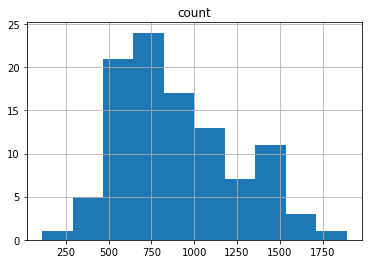

In [21]:
login_counts_perday.hist()

Let's resample our login data per week and plot the trends.

<AxesSubplot:xlabel='login_time'>

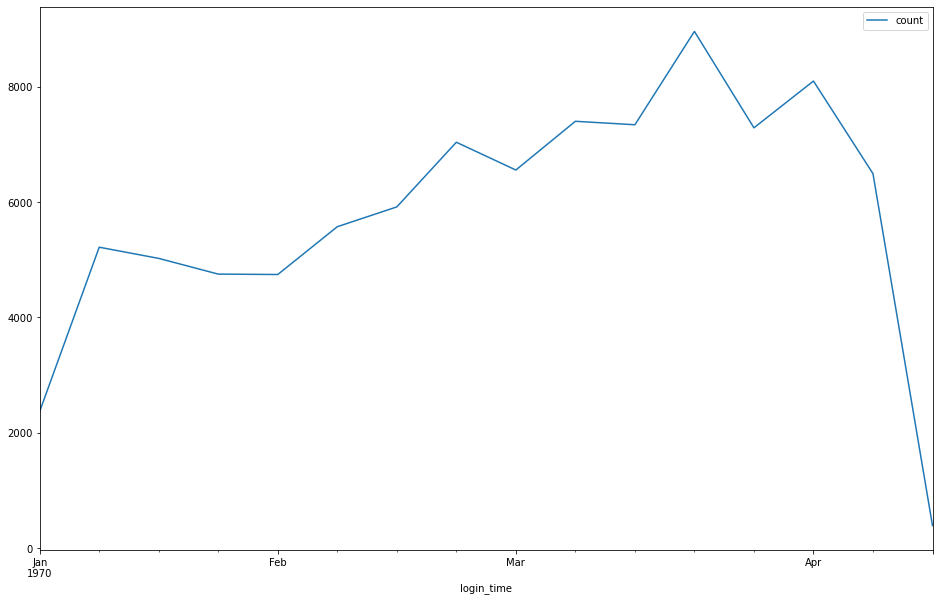

In [22]:
login_counts_perweek = login_df.resample('W').sum()
login_counts_perweek.plot(kind='line', figsize=(16,10))

According to the Weekly logins chart we can see that there is a surge in logins during mid Jan, weekly logins increases every month, there is a upward trend in weekly logins through feb to march.It hits its peak during late March, consistent to the 15 min chart. The upward trend continues in April, but then there seems to be a donwntrend later n April.

In [23]:
login_counts_perweek.describe()

,count
count,16.00000
mean,5821.37500
std,2146.08325
min,395.00000
25%,4955.00000
50%,6203.00000
75%,7298.25000
max,8955.00000


#### Part2 Experiment and Metrics design

The key measure of success would be rider being retained.To experiment this, we will have to do a A/B testing. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective.

The city has decided to reimburse all tolls.However for experimentation purposes,we could make 'A' as a group of drivers who are aware of the toll reimbursement and 'B' - a group of drivers who are not aware of the reimbursement. 
We can perform a 'Two sample hypothesis test' and state a null hypothesis that 'Toll reimbursement has no effect on rider retention' and alternate hypothesis which suggests ' Toll reimbursement does have an effect on rider retention'. Then we coud perform t-tests. If the t-test alpha value is less than 0.05 we can reject the null hypothesis and accept the alternate hypothesis, if not we accept the null hypothesis is true.

#### Part3 -Predictive Modeling

In [24]:
file1= open('/Users/jisasv1/Documents/ultimate_challenge/ultimate_data_challenge.json')

In [25]:
#load json file
ultimate_data = json.load(file1)

In [26]:
type(ultimate_data)

list

In [27]:
#Covert it to pandas dataframe
ultimate_df = pd.DataFrame(ultimate_data)

In [28]:
ultimate_df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [29]:
ultimate_df.shape

(50000, 12)

In [30]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [31]:
#Check for null values
ultimate_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

Let's fill the NaNs in the 'avg_rating_of_driver' and 'avg_rating_by_driver' with their mean values

In [32]:
ultimate_df['avg_rating_of_driver'].fillna(value=ultimate_df['avg_rating_of_driver'].mean(), inplace=True)

In [33]:
ultimate_df['avg_rating_by_driver'].fillna(value=ultimate_df['avg_rating_by_driver'].mean(), inplace=True)

In [34]:
#Fill the Nan value for the 'phone' column with 'Unknown' because it is a categorical value.
ultimate_df['phone']= ultimate_df['phone'].fillna('Unknown')

In [35]:
ultimate_df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

The document says a user is considered 'retained' if they were 'active' in the preceding 30 days. So we have to find out which riders took a trip in the last 30 days. We do not know which riders are active. This is what we have to predict our 'y'. Our y or 'active_users' are the ones who have taken a trip in the preceding 30 days. let's calculate y.

In [36]:
#Convert last_trip_date to python datetime
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

In [37]:
recent_trip_date = ultimate_df['last_trip_date'].max()

In [38]:
#To calculate active_users 
# from datetime import datetime, timedelta
# time_active = datetime.now() - recent_trip_date

# if  time_active.days<30:
#     print (1)

# else:
#     print (0)

Find out if a rider is 'active' or not and add that column to the dataframe.

In [39]:
#df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

In [40]:
#Calculate if a rider is a  active user or not
from datetime import datetime, timedelta
ultimate_df['active_user'] = ultimate_df['last_trip_date'].apply(lambda x:'True' if (recent_trip_date-x).days<30 else 'False')
#refernce:https://datatofish.com/if-condition-in-pandas-dataframe/

In [41]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [42]:
ultimate_df['active_user'].unique()

array(['True', 'False'], dtype=object)

In [43]:
ultimate_df['active_user'].value_counts()

False    31690
True     18310
Name: active_user, dtype: int64

In our dataset, out of 50,000 riders 31,690 are inactive, only 18,310 are active riders.

In [44]:
inactive_rider_percent=31690/50000 *100
inactive_rider_percent

63.38

In [45]:
active_rider_percent=18310/50000 *100
active_rider_percent

36.620000000000005

#### EDA

In [46]:
ultimate_df['active_user']= ultimate_df['active_user'].replace('True',1)

In [47]:
ultimate_df['active_user']= ultimate_df['active_user'].replace('False',0)

<AxesSubplot:xlabel='active_user', ylabel='trips_in_first_30_days'>

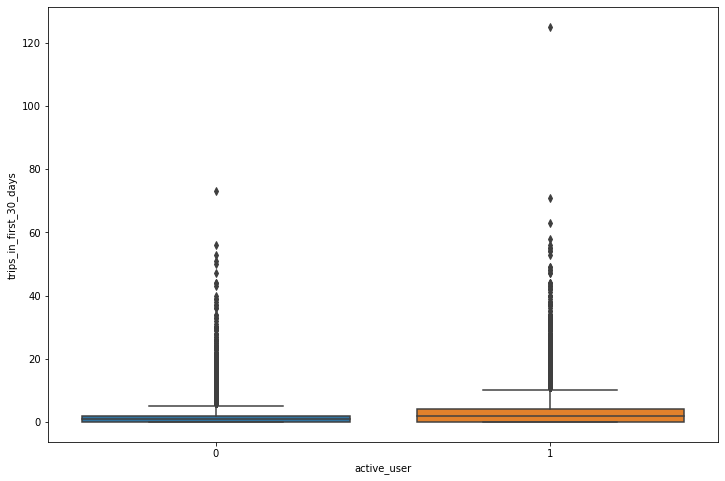

In [48]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x='active_user', y='trips_in_first_30_days', data=ultimate_df) 

The graph reads that the active_users have taken more trips in the first 30 days of signing up. This is pretty interesting.

<AxesSubplot:xlabel='active_user', ylabel='avg_rating_by_driver'>

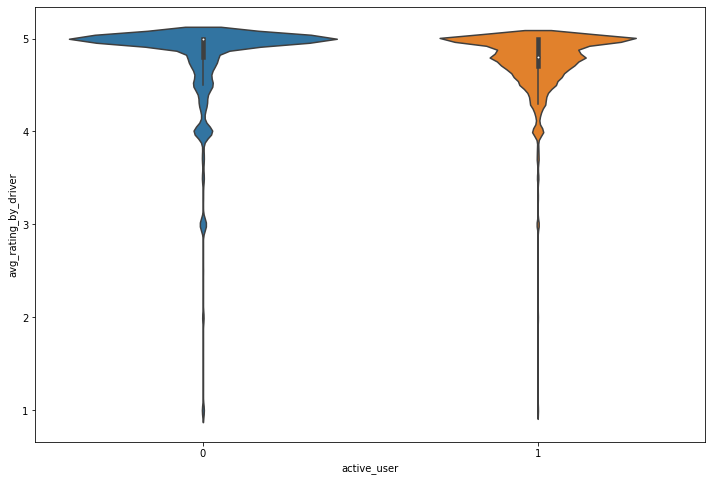

In [49]:
plt.figure(figsize=(12,8))
sns.violinplot(x='active_user', y='avg_rating_by_driver', data=ultimate_df) 

Looks like the inactive_users have higher average rating than active users.The white dot in the violin plot reperesents the median. For inactive users it is almost 5. For active users it's around 4.7. This is counter intuitive.

<AxesSubplot:xlabel='active_user', ylabel='weekday_pct'>

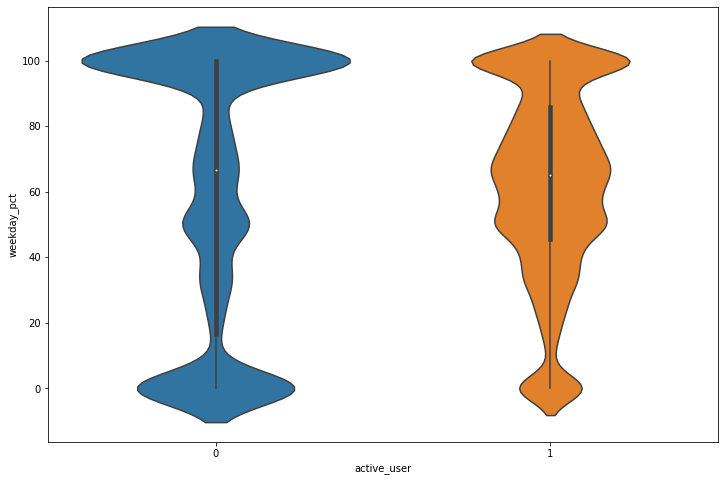

In [50]:
plt.figure(figsize=(12,8))
sns.violinplot(x='active_user', y='weekday_pct', data=ultimate_df) 

The thick grey line represents the interquartile range. This suggests that inactive users take more trips during a weekday compared to active users. This indirectly suggests that active users travel more during weekends..

<AxesSubplot:xlabel='active_user', ylabel='avg_rating_of_driver'>

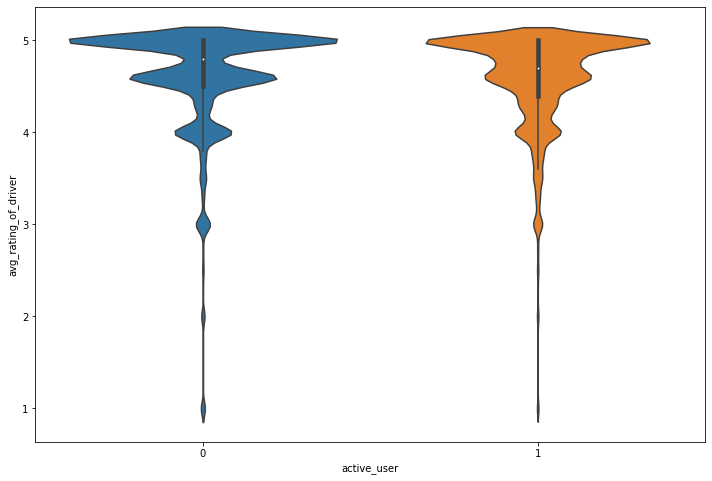

In [51]:
plt.figure(figsize=(12,8))
sns.violinplot(x='active_user', y='avg_rating_of_driver', data=ultimate_df) 

array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'last_trip_date'}>,
        <AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>],
       [<AxesSubplot:title={'center':'avg_dist'}>,
        <AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:title={'center':'active_user'}>]], dtype=object)

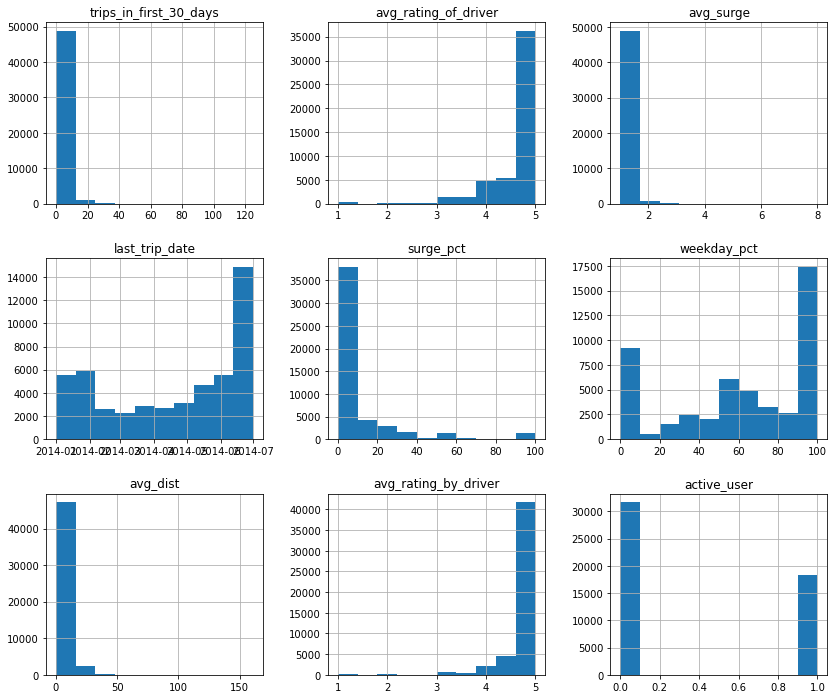

In [52]:
ultimate_df.hist(figsize=(14,12))

Feature Engineering

In [53]:
#Let's do our feature selection.
#Make a variable called 'categorical', and a list containing all Categorical(object) types columns 
categorical = ['city','phone','ultimate_black_user']

In [54]:
X_cat= ultimate_df[categorical]

In [55]:
#Creating dummies for the features columns
X_cat= pd.get_dummies(X_cat)   
X_cat

,ultimate_black_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,True,0,1,0,0,0,1
1,False,1,0,0,1,0,0
2,False,1,0,0,0,0,1
3,True,0,1,0,0,0,1
4,False,0,0,1,1,0,0
...,...,...,...,...,...,...,...
49995,False,0,1,0,0,0,1
49996,False,1,0,0,0,0,1
49997,True,0,0,1,1,0,0
49998,False,1,0,0,0,0,1


In [57]:
# #Make a variable called numerical and a list containing all Numerical columns
X_numerical= ultimate_df.drop(['city','phone','ultimate_black_user','signup_date','last_trip_date','active_user'], axis=1)
X_numerical

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4,4.700000,1.10,15.4,46.2,3.67,5.0
1,0,5.000000,1.00,0.0,50.0,8.26,5.0
2,3,4.300000,1.00,0.0,100.0,0.77,5.0
3,9,4.600000,1.14,20.0,80.0,2.36,4.9
4,14,4.400000,1.19,11.8,82.4,3.13,4.9
...,...,...,...,...,...,...,...
49995,0,5.000000,1.00,0.0,100.0,5.63,4.2
49996,1,4.601559,1.00,0.0,0.0,0.00,4.0
49997,0,5.000000,1.00,0.0,100.0,3.86,5.0
49998,2,3.000000,1.00,0.0,100.0,4.58,3.5


In [58]:
#X= ultimate_df[categorical]

In [59]:
#X= pd.get_dummies(X) #Creating dummies for the features columns

In [60]:
# from sklearn.model_selection import train_test_split

# # dont forget to define your X and y
# X = ultimate_df.drop(["active_user", "last_trip_date","signup_date"],axis=1)
# y= ultimate_df['active_user']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [62]:
#scale data
from sklearn import preprocessing
import numpy as np
#build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_numerical)
X_numerical_scaled=scaler.transform(X_numerical)
#X_test_scaled=scaler.transform(X_test)

In [63]:
X_numerical_scaled = pd.DataFrame(X_numerical_scaled)
X_numerical_scaled

,0,1,2,3,4,5,6
0,0.453984,1.742403e-01,0.113506,0.328202,-0.397131,-0.372650,0.497684
1,-0.600689,7.052411e-01,-0.336268,-0.443394,-0.294653,0.431583,0.497684
2,0.190316,-5.337607e-01,-0.336268,-0.443394,1.053741,-0.880771,0.497684
3,1.772325,-2.759950e-03,0.293416,0.558679,0.514383,-0.602181,0.273342
4,3.090665,-3.567605e-01,0.518303,0.147829,0.579106,-0.467266,0.273342
...,...,...,...,...,...,...,...
49995,-0.600689,7.052411e-01,-0.336268,-0.443394,1.053741,-0.029230,-1.297050
49996,-0.337021,-2.766857e-13,-0.336268,-0.443394,-1.643048,-1.015686,-1.745733
49997,-0.600689,7.052411e-01,-0.336268,-0.443394,1.053741,-0.339360,0.497684
49998,-0.073352,-2.834764e+00,-0.336268,-0.443394,1.053741,-0.213205,-2.867442


In [64]:
#Reassign the solumn names
X_numerical_scaled.columns= X_numerical.columns

In [65]:
X_numerical_scaled

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,0.453984,1.742403e-01,0.113506,0.328202,-0.397131,-0.372650,0.497684
1,-0.600689,7.052411e-01,-0.336268,-0.443394,-0.294653,0.431583,0.497684
2,0.190316,-5.337607e-01,-0.336268,-0.443394,1.053741,-0.880771,0.497684
3,1.772325,-2.759950e-03,0.293416,0.558679,0.514383,-0.602181,0.273342
4,3.090665,-3.567605e-01,0.518303,0.147829,0.579106,-0.467266,0.273342
...,...,...,...,...,...,...,...
49995,-0.600689,7.052411e-01,-0.336268,-0.443394,1.053741,-0.029230,-1.297050
49996,-0.337021,-2.766857e-13,-0.336268,-0.443394,-1.643048,-1.015686,-1.745733
49997,-0.600689,7.052411e-01,-0.336268,-0.443394,1.053741,-0.339360,0.497684
49998,-0.073352,-2.834764e+00,-0.336268,-0.443394,1.053741,-0.213205,-2.867442


In [66]:
X = pd.concat([X_numerical_scaled, X_cat],axis=1)

In [67]:
y= ultimate_df[['active_user']]

In [68]:
#X= ultimate_df.drop(['active_user'],axis=1)

In [69]:
#Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 123
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                 test_size = 0.25,
                                                 random_state = 123)

#### Modeling

Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state = 1,n_jobs=-1)

In [71]:
clf.fit(X_train, y_train)

<ipython-input-71-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [72]:
y_pred_rf= clf.predict(X_test)

In [73]:
# calculate the accuary
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_rf)

0.75248

<AxesSubplot:>

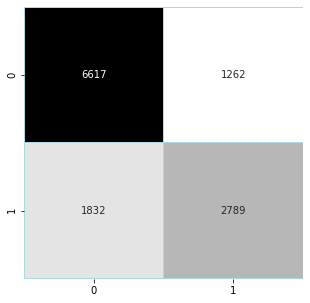

In [74]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,ax=ax, cbar=False, annot=True, fmt='d', cmap='gist_yarg',
            linewidths=0.1,linecolor='lightblue')

In [75]:
#print the classification report
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7879
           1       0.69      0.60      0.64      4621

    accuracy                           0.75     12500
   macro avg       0.74      0.72      0.73     12500
weighted avg       0.75      0.75      0.75     12500



The modelgives good precision and recall for 0. Since our data is imbalanced, has more representations for 'False' then 'True' it would be better to use f1 score to evaluate. Weighted f1 score is better.

Support Vector Machine

In [76]:
from sklearn.svm import SVC  
svm = SVC() 
  
# fitting x samples and y classes 
svm.fit(X_train, y_train)

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [77]:
y_pred_svm= svm.predict(X_test)

In [78]:
# calculate the accuary
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_svm)

0.77408

<AxesSubplot:>

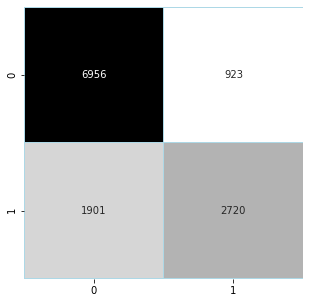

In [79]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,ax=ax, cbar=False, annot=True, fmt='d', cmap='gist_yarg',
            linewidths=0.1,linecolor='lightblue')

In [80]:
#print the classification report
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      7879
           1       0.75      0.59      0.66      4621

    accuracy                           0.77     12500
   macro avg       0.77      0.74      0.74     12500
weighted avg       0.77      0.77      0.77     12500



Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [83]:
y_pred_lr= lr.predict(X_test)

In [84]:
metrics.accuracy_score(y_test, y_pred_lr)

0.72336

<AxesSubplot:>

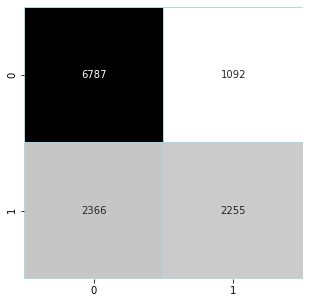

In [85]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred_lr)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,ax=ax, cbar=False, annot=True, fmt='d', cmap='gist_yarg',
            linewidths=0.1,linecolor='lightblue')

In [86]:
#print the classification report
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      7879
           1       0.67      0.49      0.57      4621

    accuracy                           0.72     12500
   macro avg       0.71      0.67      0.68     12500
weighted avg       0.72      0.72      0.71     12500



K-nearest neighbors

In [87]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

/Users/jisasv1/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [88]:
y_pred_knn= neigh.predict(X_test)

In [89]:
metrics.accuracy_score(y_test, y_pred_knn)

0.73592

<AxesSubplot:>

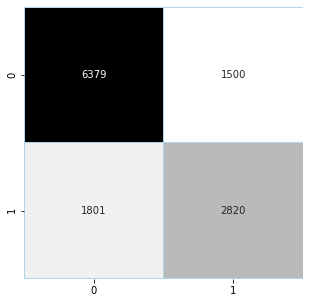

In [90]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred_knn)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,ax=ax, cbar=False, annot=True, fmt='d', cmap='gist_yarg',
            linewidths=0.1,linecolor='lightblue')

In [91]:
#print the classification report
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      7879
           1       0.65      0.61      0.63      4621

    accuracy                           0.74     12500
   macro avg       0.72      0.71      0.71     12500
weighted avg       0.73      0.74      0.73     12500



14


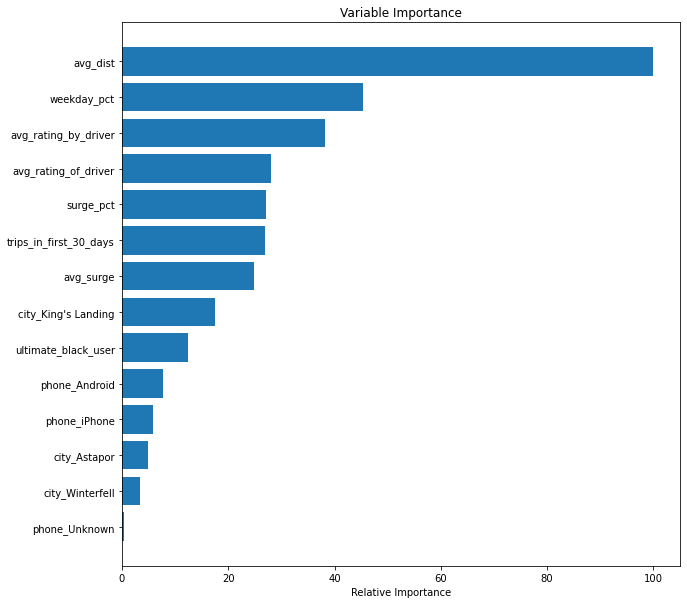

In [92]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Evaluation and Conclusion

I have used 4 models. Random Forest Classifier, Support Vector Machine, Logistic regression and K Nearest Neighbors.
 

Random Forest classifier has an accuracy of around 75%. SMM has accuracy of 77.6%.Logistic Regression has an accuracy of 72% and KNN has accuracy 73%.  However, since the data we have here is imbalanced, we will have to use  F1 score to evaluate. Weighted F1 score is a better choice. 

Compared to the other 3 models, Support Vector Machine has a better accuracy(almost 78%) and Weighted F1 score (0.77). 
So we can consider SVM model is a better fit for our data.

The Feature importance graph suggests the foloowing features can be considered more important and relevant:-
1. Average distance- Rider retention seems to be highly dependant on 'avg distance' travelled. 
2. Weekday pct - This feature is of importance too. From our EDA, it seems like the riders who travelled more during weekdays were not active in the last 30 das. That means mst of our active riders travel during the weekends.
3. avg_rating_by_driver - This is an important feature among active users. However, through our EDA we know that riders who are inactive have a slightly higher rating than our active riders. However, this feature is quite relevant.

These 3 are the top 3 features that effect rider retention. However from our EDA we saw that riders who were active in the first 30 days after signing up were also active later on. So trip in first 30 days also can be considered as one of the important features among the active users.